# Semana 1 - Aprendizagem Supervisonada
---



## Pré-Processamento dos Dados.

### Importando as bibliotecas

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



### Importando e explorando o dataset

In [4]:
data_url = 'https://raw.githubusercontent.com/intelligentagents/aprendizagem-supervisionada/master/data/preprocessing_data.csv'

df = pd.read_csv(data_url)

df.head(10)

,City,Age,Salary,Sex,Acquired
0,Paraiba,42.0,6500.0,M,No
1,Sao Paulo,21.0,4300.0,F,Yes
2,Brasilia,28.0,4900.0,F,No
3,Recife,35.0,5400.0,F,No
4,Maceio,38.0,NaN,M,Yes
5,Sao Paulo,33.0,5200.0,M,Yes
6,Belo Horizonte,NaN,4700.0,F,No
7,Sao Paulo,45.0,7100.0,M,Yes
8,Paraiba,51.0,7500.0,F,No
9,Fortaleza,39.0,6000.0,M,Yes


Descrevendo o dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      10 non-null     object 
 1   Age       9 non-null      float64
 2   Salary    9 non-null      float64
 3   Sex       10 non-null     object 
 4   Acquired  10 non-null     object 
dtypes: float64(2), object(3)
memory usage: 528.0+ bytes


Exibindo o sumário dos valores númericos do dataset:

In [6]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,36.888889,5733.333333
std,8.992281,1110.180166
min,21.000000,4300.000000
25%,33.000000,4900.000000
50%,38.000000,5400.000000
75%,42.000000,6500.000000
max,51.000000,7500.000000


Analisando a Distribuição das váriaveis numéricas em um bloxplot:


<AxesSubplot:>

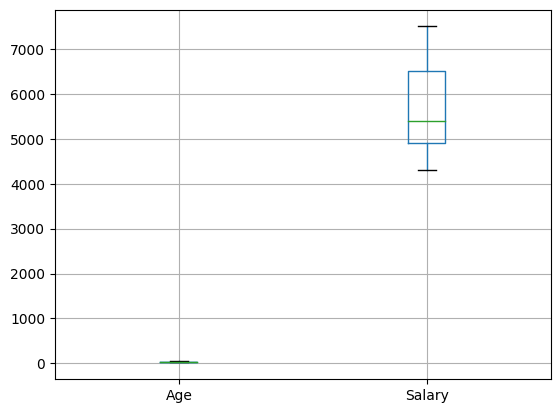

In [8]:
df.boxplot()

Analisando a Distribuição das váriaveis numéricas em um gráfico de barras:


In [9]:
df.hist()

AttributeError: 'NoneType' object has no attribute 'canvas'

### Manipulação e tratamento dos dados.

Detectando registros com valores nulos no dataframe:

In [10]:
df[df.isnull().any(axis=1)]

,City,Age,Salary,Sex,Acquired
4,Maceio,38.0,NaN,M,Yes
6,Belo Horizonte,NaN,4700.0,F,No


Deletando registros com valores nulos:

In [11]:
df.dropna()

,City,Age,Salary,Sex,Acquired
0,Paraiba,42.0,6500.0,M,No
1,Sao Paulo,21.0,4300.0,F,Yes
2,Brasilia,28.0,4900.0,F,No
3,Recife,35.0,5400.0,F,No
5,Sao Paulo,33.0,5200.0,M,Yes
7,Sao Paulo,45.0,7100.0,M,Yes
8,Paraiba,51.0,7500.0,F,No
9,Fortaleza,39.0,6000.0,M,Yes


Preenchendo os registros nuḿericos que não possuem valores com zeros:

In [12]:
df.fillna(0)

,City,Age,Salary,Sex,Acquired
0,Paraiba,42.0,6500.0,M,No
1,Sao Paulo,21.0,4300.0,F,Yes
2,Brasilia,28.0,4900.0,F,No
3,Recife,35.0,5400.0,F,No
4,Maceio,38.0,0.0,M,Yes
5,Sao Paulo,33.0,5200.0,M,Yes
6,Belo Horizonte,0.0,4700.0,F,No
7,Sao Paulo,45.0,7100.0,M,Yes
8,Paraiba,51.0,7500.0,F,No
9,Fortaleza,39.0,6000.0,M,Yes


Preenchendo os registros nuḿericos que não possuem valores com a média.

In [13]:
df.fillna(df.mean())

/var/folders/96/v98rl5mx1sxdlg9hmsyd9bfm0000gn/T/ipykernel_6166/634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,City,Age,Salary,Sex,Acquired
0,Paraiba,42.000000,6500.000000,M,No
1,Sao Paulo,21.000000,4300.000000,F,Yes
2,Brasilia,28.000000,4900.000000,F,No
3,Recife,35.000000,5400.000000,F,No
4,Maceio,38.000000,5733.333333,M,Yes
5,Sao Paulo,33.000000,5200.000000,M,Yes
6,Belo Horizonte,36.888889,4700.000000,F,No
7,Sao Paulo,45.000000,7100.000000,M,Yes
8,Paraiba,51.000000,7500.000000,F,No
9,Fortaleza,39.000000,6000.000000,M,Yes


Salvando o dataframe com os registros nuḿericos que não possuem valores com a mediana.

In [14]:
df = df.fillna(df.median())
df

/var/folders/96/v98rl5mx1sxdlg9hmsyd9bfm0000gn/T/ipykernel_6166/1571542190.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


,City,Age,Salary,Sex,Acquired
0,Paraiba,42.0,6500.0,M,No
1,Sao Paulo,21.0,4300.0,F,Yes
2,Brasilia,28.0,4900.0,F,No
3,Recife,35.0,5400.0,F,No
4,Maceio,38.0,5400.0,M,Yes
5,Sao Paulo,33.0,5200.0,M,Yes
6,Belo Horizonte,38.0,4700.0,F,No
7,Sao Paulo,45.0,7100.0,M,Yes
8,Paraiba,51.0,7500.0,F,No
9,Fortaleza,39.0,6000.0,M,Yes


Definindos as variáveis independentes (X) e dependente (y).

In [15]:
X = df.iloc[:, :-1].values
X

array([['Paraiba', 42.0, 6500.0, 'M'],
       ['Sao Paulo', 21.0, 4300.0, 'F'],
       ['Brasilia', 28.0, 4900.0, 'F'],
       ['Recife', 35.0, 5400.0, 'F'],
       ['Maceio', 38.0, 5400.0, 'M'],
       ['Sao Paulo', 33.0, 5200.0, 'M'],
       ['Belo Horizonte', 38.0, 4700.0, 'F'],
       ['Sao Paulo', 45.0, 7100.0, 'M'],
       ['Paraiba', 51.0, 7500.0, 'F'],
       ['Fortaleza', 39.0, 6000.0, 'M']], dtype=object)

In [16]:
y = df.iloc[:, 4].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

Codificando os valores da variável dependente (y) com valores númericos. 

In [17]:
le = LabelEncoder()

y = df.iloc[:, 4].values
y = le.fit_transform(y)

y


array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

Criando variáveis Dummy. 

*Obs*: Algumas técnicas de aprendizado de máquina exigem que você elimine uma dimensão da apresentação para evitar a dependência entre as variáveis. Isso pode ser feito através do parâmetro "drop_first = True".

In [18]:

pd.get_dummies(df.iloc[:, :-1] ,prefix=['city', 'sex'], drop_first=True)

,Age,Salary,city_Brasilia,city_Fortaleza,city_Maceio,city_Paraiba,city_Recife,city_Sao Paulo,sex_M
0,42.0,6500.0,0,0,0,1,0,0,1
1,21.0,4300.0,0,0,0,0,0,1,0
2,28.0,4900.0,1,0,0,0,0,0,0
3,35.0,5400.0,0,0,0,0,1,0,0
4,38.0,5400.0,0,0,1,0,0,0,1
5,33.0,5200.0,0,0,0,0,0,1,1
6,38.0,4700.0,0,0,0,0,0,0,0
7,45.0,7100.0,0,0,0,0,0,1,1
8,51.0,7500.0,0,0,0,1,0,0,0
9,39.0,6000.0,0,1,0,0,0,0,1


Criando a função de escalonamento:

In [19]:
# Função de escalonamento
def feature_scaling(data):
    sc = StandardScaler()
    return sc.fit_transform(data)

Visualizando a primeira instância do array de features após a aplicação da transformação do escalonamento.

In [20]:
X = pd.get_dummies(df.iloc[:, :-1] ,prefix=['city', 'sex'], drop_first=True).values

X = feature_scaling(X)

X[:, 1]

array([ 0.80160482, -1.40280843, -0.80160482, -0.30060181, -0.30060181,
       -0.50100301, -1.00200602,  1.40280843,  1.80361084,  0.30060181])

### Visualização dos Dados

Visualizando os dados numéricos (idade e salário) através de um gráfico de dispersão. Os eixo x e y correspondem ao salário e a idade respectivamente. Já as cores dos pontos estão relacionadas a variável *Acquired*, que siginifica se o cliente realizou a compra.

In [21]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="Salary", y="Age", hue="Acquired", data=df)


AttributeError: 'NoneType' object has no attribute 'canvas'